In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
from sklearn import metrics

In [2]:
train = pd.read_csv('ad_org_train.csv')
test = pd.read_csv('ad_org_test.csv')
FINAL = pd.read_csv('FINAL.csv')
FINAL_test = pd.read_csv('FINAL_test.csv')

In [3]:
FINAL.shape

(14999, 11)

In [4]:
r, c = train.shape
all_data = pd.concat([FINAL,FINAL_test])
all_data.reset_index(drop=True, inplace=True)

In [5]:
all_data.head()

,vidid,views,likes,dislikes,comment,published,category,Hours,minu,seco,Total Time
0,18655,1031602,8523,363,1095,2016-09-14,5,0,7,37,457
1,14135,1707,56,2,6,2016-10-01,3,0,9,30,570
2,2187,2023,25,0,2,2016-07-02,2,0,2,16,136
3,23096,620860,777,161,153,2016-07-27,7,0,4,22,262
4,10175,666,1,0,0,2016-06-29,3,0,0,31,31


In [6]:
all_data.describe()

,vidid,views,likes,dislikes,comment,category,Hours,minu,seco,Total Time
count,23763.000000,2.376300e+04,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000,23763.000000
mean,11881.000000,7.293898e+05,2786.453815,256.581198,422.993435,3.606826,0.117115,9.315406,29.293650,1009.831461
std,6859.931559,3.118797e+06,9252.363344,1030.445212,1738.477586,1.576695,0.537738,11.737095,17.066167,2222.726562
min,0.000000,2.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5940.500000,3.113500e+04,82.000000,7.000000,7.000000,3.000000,0.000000,2.000000,15.000000,177.000000
50%,11881.000000,1.574800e+05,433.000000,37.000000,43.000000,3.000000,0.000000,5.000000,30.000000,319.000000
75%,17821.500000,5.882525e+05,1822.000000,166.000000,218.000000,5.000000,0.000000,11.000000,44.000000,700.000000
max,23762.000000,2.251478e+08,320072.000000,49449.000000,85250.000000,7.000000,11.000000,59.000000,59.000000,42317.000000


In [7]:
train['adview'].describe()

count    1.499900e+04
mean     2.107791e+03
std      5.237711e+04
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      6.000000e+00
max      5.429665e+06
Name: adview, dtype: float64

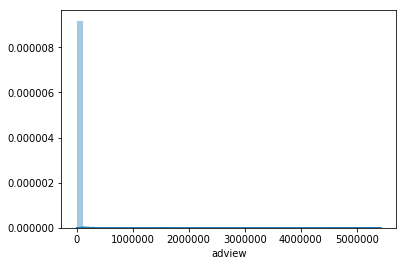

In [8]:
sns.distplot(train['adview'])

# Log Transformation because target variable is highly skewed

In [9]:
y = np.log1p(train['adview'])


In [10]:
y.describe()

count    14999.000000
mean         1.780293
std          1.917101
min          0.693147
25%          0.693147
50%          1.098612
75%          1.945910
max         15.507388
Name: adview, dtype: float64

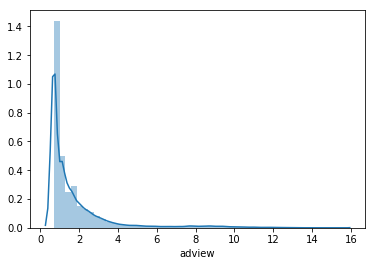

In [11]:
sns.distplot(y)

In [12]:
from datetime import datetime,date

all_data['published'] = pd.to_datetime(all_data['published'])
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']

all_data = all_data.join(pd.concat((getattr(all_data['published'].dt, i).rename(i) for i in L), axis=1))

all_data.drop('published',axis=1,inplace=True)

In [13]:
#all_data.drop('vidid',axis=1,inplace=True)

In [14]:
all_data.head()

,vidid,views,likes,dislikes,comment,category,Hours,minu,seco,Total Time,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,18655,1031602,8523,363,1095,5,0,7,37,457,2016,9,14,2,258,37,3
1,14135,1707,56,2,6,3,0,9,30,570,2016,10,1,5,275,39,4
2,2187,2023,25,0,2,2,0,2,16,136,2016,7,2,5,184,26,3
3,23096,620860,777,161,153,7,0,4,22,262,2016,7,27,2,209,30,3
4,10175,666,1,0,0,3,0,0,31,31,2016,6,29,2,181,26,2


## SCALING

In [15]:
numeric_features = all_data.loc[:,['views', 'likes', 'dislikes','comment']]
numeric_features_standardized = np.log1p(numeric_features)

In [16]:
all_data.update(numeric_features_standardized)

In [17]:
all_data.head()

,vidid,views,likes,dislikes,comment,category,Hours,minu,seco,Total Time,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,18655,13.846624,9.050641,5.897154,6.999422,5,0,7,37,457,2016,9,14,2,258,37,3
1,14135,7.443078,4.043051,1.098612,1.945910,3,0,9,30,570,2016,10,1,5,275,39,4
2,2187,7.612831,3.258097,0.000000,1.098612,2,0,2,16,136,2016,7,2,5,184,26,3
3,23096,13.338863,6.656727,5.087596,5.036953,7,0,4,22,262,2016,7,27,2,209,30,3
4,10175,6.502790,0.693147,0.000000,0.000000,3,0,0,31,31,2016,6,29,2,181,26,2


In [18]:
X_Train = all_data[:r]
X_Test = all_data[r:]

# MODELLING

In [19]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor

C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_Train.values)
    rmse= np.sqrt(-cross_val_score(model, X_Train.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [21]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


In [22]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [23]:
GBoost = GradientBoostingRegressor()

In [24]:
model_xgb = xgb.XGBRegressor(n_estimators=950,learning_rate=0.13,max_depth=6)

In [25]:
model_lgb = lgb.LGBMRegressor(objective='regression',n_estimators=550,learning_rate=0.05,num_leaves=65)

In [32]:
rfc = RandomForestRegressor(n_estimators=550)

In [26]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 1.8925 (0.0651)



In [27]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 1.8925 (0.0651)



In [28]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 1.6709 (0.0794)



In [29]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 1.5121 (0.0661)



In [30]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 1.5362 (0.0748)



In [33]:
score = rmsle_cv(rfc)
print("RFR score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

RFR score: 1.5485 (0.0799)



In [34]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [35]:
model_xgb.fit(X_Train, y)
xgb_train_pred = model_xgb.predict(X_Train)
xgb_pred = np.expm1(model_xgb.predict(X_Test))
print(rmsle(y, xgb_train_pred))

0.3253293471428295


In [36]:
model_lgb.fit(X_Train, y)
lgb_train_pred = model_lgb.predict(X_Train)
lgb_pred = np.expm1(model_lgb.predict(X_Test.values))
print(rmsle(y, lgb_train_pred))

0.7638399739605216


In [37]:
rfc.fit(X_Train, y)
rfc_train_pred = rfc.predict(X_Train)
rfc_pred = np.expm1(rfc.predict(X_Test.values))
print(rmsle(y, rfc_train_pred))

0.563694732943661


# Best model - XGBOOST Regressor (rmse = 0.325)

In [38]:
xgb_pred

array([ 8.399019 ,  7.226409 ,  2.1075935, ..., 21.187172 ,  2.1974287,
        7.124587 ], dtype=float32)

In [39]:
test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [46]:
sub = pd.DataFrame(test['vidid'])
sub['ad_view'] = xgb_pred


In [48]:
sub.columns = ['vid_id', 'ad_view']

In [49]:
sub

,vid_id,ad_view
0,VID_1054,8.399019
1,VID_18629,7.226409
2,VID_13967,2.107594
3,VID_19442,39.631092
4,VID_770,4.872265
5,VID_10315,2.026035
6,VID_7417,3.879701
7,VID_17788,2.636895
8,VID_14591,4.977223
9,VID_1228,4.441338


In [53]:
sub.to_csv('FINAL_Pred.csv',index=False)